In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('salaries.csv')
#  print(data)
data_numeric = pd.DataFrame()
data_features = []

le = LabelEncoder()
for i in data.columns:
  if not i in  data.describe().columns:
    data[f'{i}_numeric'] = le.fit_transform(data[i])
    data_numeric[f'{i}_numeric'] = le.fit_transform(data[i])
    data_features.append(i)
  else:
    data_numeric[i] = data[i]
    data_features.append(i)



data_numeric

,work_year,experience_level_numeric,employment_type_numeric,job_title_numeric,salary,salary_currency_numeric,salary_in_usd,employee_residence_numeric,remote_ratio,company_location_numeric,company_size_numeric
0,2023,3,2,25,202800,20,202800,81,0,71,0
1,2023,3,2,25,104300,20,104300,81,0,71,0
2,2023,2,2,47,60000,7,73824,31,0,27,1
3,2023,2,2,47,55000,7,67672,31,0,27,1
4,2023,3,2,62,290000,20,290000,81,0,71,1
...,...,...,...,...,...,...,...,...,...,...,...
7969,2020,3,2,62,412000,20,412000,81,100,71,0
7970,2021,2,2,107,151000,20,151000,81,100,71,0
7971,2020,0,2,62,105000,20,105000,81,100,71,2
7972,2020,0,0,21,100000,20,100000,81,100,71,0


In [85]:
from sklearn.decomposition import PCA, IncrementalPCA

n_components = 10
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)



In [81]:
X = data_numeric.iloc[:, data_numeric.columns!='salary_in_usd']
y = data_numeric.iloc[:, data_numeric.columns=='salary_in_usd']

from sklearn.preprocessing import StandardScaler
# #3 Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)



/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


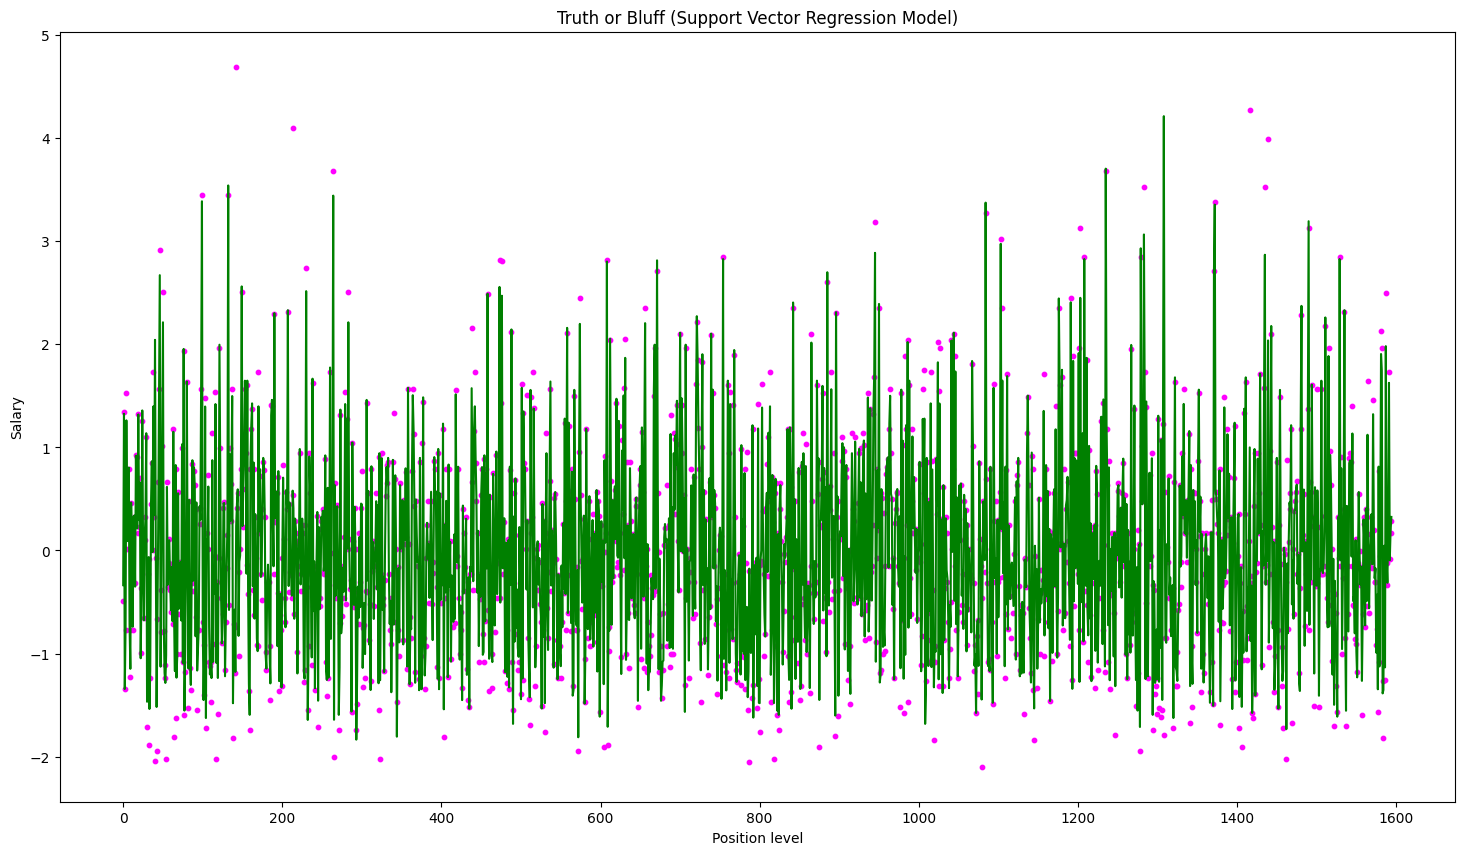

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X_ipca, y, test_size=0.20, random_state=42)
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
plt.rcParams["figure.figsize"] = (18, 10)
index = np.arange(0, len(y_pred), 1)
plt.scatter(index, y_test, color = 'magenta', s=10)
plt.plot(index, y_pred, color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


In [87]:
mean_squared_error(y_test, y_pred)

0.12366654622069748

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'kernel': [ 'linear', 'poly', 'sigmoid'],
   
}
regressor = SVR()


model = GridSearchCV(regressor, parameters)

model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(estimator=SVR(),
             param_grid={'kernel': ['linear', 'poly', 'sigmoid']})

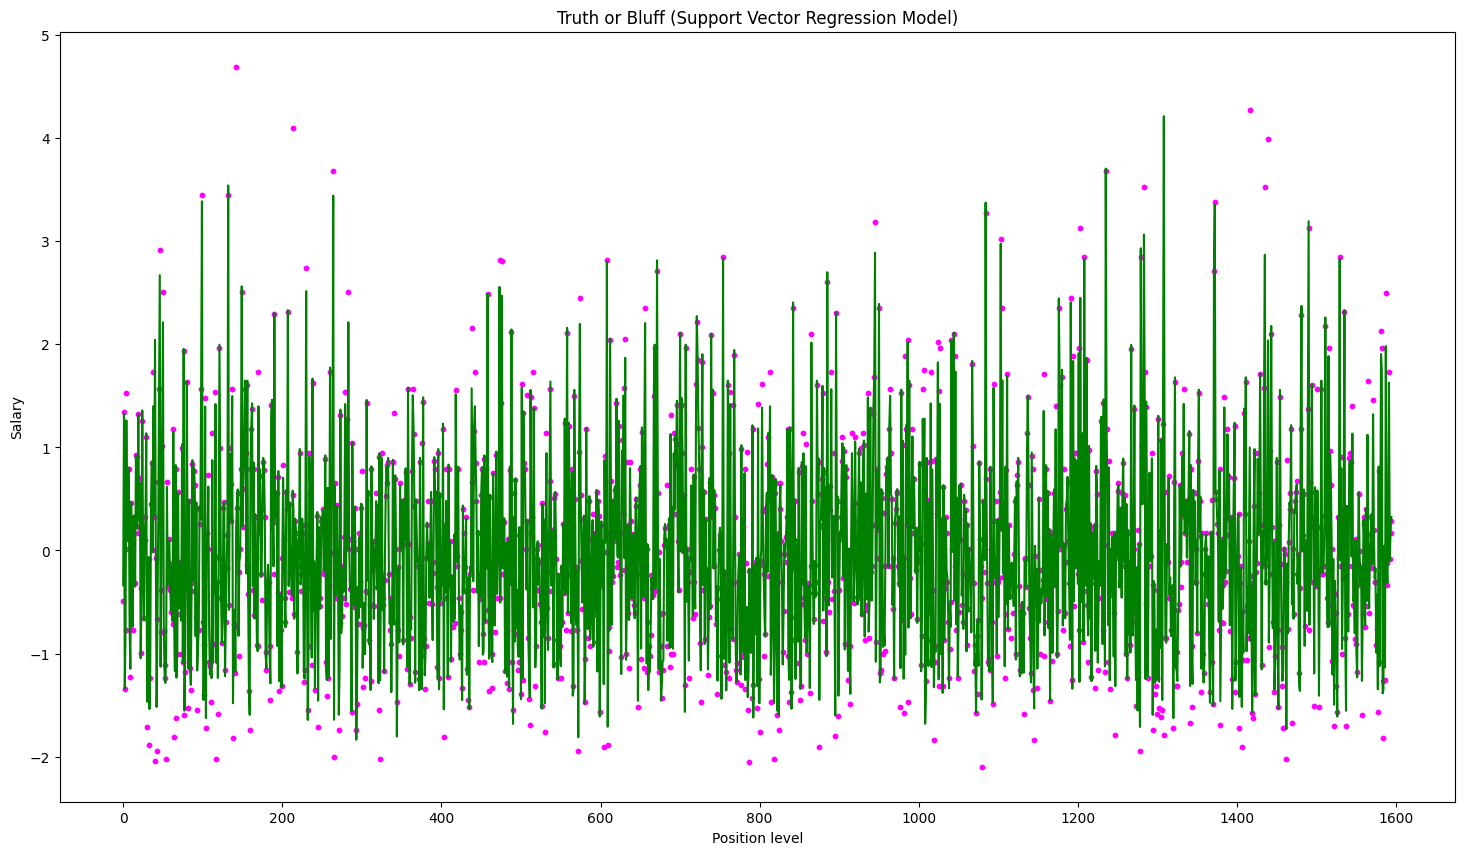

In [26]:
y_pred = model.predict(X_test)
plt.rcParams["figure.figsize"] = (18, 10)
index = np.arange(0, len(y_pred), 1)
plt.scatter(index, y_test, color = 'magenta', s=10)
plt.plot(index, y_pred, color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [36]:
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

from sklearn.decomposition import PCA, IncrementalPCA

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)



